- Comparing the new Y2H results (Spring 2021) to Gloria's data
- Will do it at the level of 3AT scores, since the AA test is different (previously CHX, now empty-AD)
- Check overall agreement, agreement for each of the individual experiments and at the plate level

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

from ccsblib import paros_connection

In [2]:
qry = """      select b.large_plate_name,
        retest_pla, retest_pos,
        ad_clone_acc, ad_orf_id,
            db_gene_symbol, db_orf_id,
                b.manual_score_growth as growth_score_3AT_day1,
                   c.manual_score_growth as growth_score_3AT_day2,
                          d.manual_score_growth as growth_score_LW_day1,
                   e.manual_score_growth as growth_score_LW_day2
    from tf_screen.final_retest as a
    inner join (select * from iscore.growth_result where large_plate_name like 'TFfnlr01%') as b
    on a.retest_pla = CONVERT(SUBSTRING(b.scoring_pla, -3), SIGNED)
    and a.retest_pos = b.scoring_pos
    
    LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr05%') as c
    on a.retest_pla = CONVERT(SUBSTRING(c.scoring_pla, -3), SIGNED)
    and a.retest_pos = c.scoring_pos

    LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr02%') as d
    on a.retest_pla = CONVERT(SUBSTRING(d.scoring_pla, -3), SIGNED)
    and a.retest_pos = d.scoring_pos
    
        LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr06%') as e
    on a.retest_pla = CONVERT(SUBSTRING(e.scoring_pla, -3), SIGNED)
    and a.retest_pos = e.scoring_pos

    
    where ad_clone_acc is not NULL;"""
df = pd.read_sql(qry, paros_connection())
df = df.loc[~df['ad_clone_acc'].str.startswith('control-'), :]
df['growth_score_3AT_day2'] = df['growth_score_3AT_day2'].fillna(df['growth_score_3AT_day1'])
df['growth_score_LW_day2'] = df['growth_score_LW_day2'].fillna(df['growth_score_LW_day1'])
df = (df.drop(columns=['growth_score_3AT_day1', 'growth_score_LW_day1'])
        .rename(columns={'growth_score_3AT_day2': '3AT_new', 'growth_score_LW_day2': 'LW_new'}))
df = df.drop_duplicates()
if df.duplicated(['retest_pla', 'retest_pos']).any():
    raise UserWarning('Unexpected duplicates')
# remove empty-AD and controls
df = df.loc[df['ad_orf_id'] >= 0, :]

In [6]:
df.loc[(df['retest_pla'] == 24)].sort_values('retest_pos')

,large_plate_name,retest_pla,retest_pos,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new
12026,TFfnlr01_019_020_021_022_023_024,24,A01,ZNF212-1,101391,CDC37,100009829,2,4
12025,TFfnlr01_019_020_021_022_023_024,24,A02,ZNF212-1,101391,CIB3,53473,0,4
12024,TFfnlr01_019_020_021_022_023_024,24,A03,ZNF212-1,101391,CLK2,11851,0,4
12023,TFfnlr01_019_020_021_022_023_024,24,A04,ZNF212-1,101391,ENPP7,11341,0,4
12022,TFfnlr01_019_020_021_022_023_024,24,A05,ZNF212-1,101391,FAM161A,53030,2,4
12021,TFfnlr01_019_020_021_022_023_024,24,A06,ZNF212-1,101391,FAM161B,71174,1,4
12020,TFfnlr01_019_020_021_022_023_024,24,A07,ZNF212-1,101391,FAM90A1,11110,2,4
12019,TFfnlr01_019_020_021_022_023_024,24,A08,ZNF212-1,101391,GAS8,71876,2,4
12018,TFfnlr01_019_020_021_022_023_024,24,A09,ZNF212-1,101391,GYS1,4812,2,4
12017,TFfnlr01_019_020_021_022_023_024,24,A10,ZNF212-1,101391,IL16,8787,2,4


In [2]:


def latest_y2h_data():
    qry = """      select b.large_plate_name,
            retest_pla, retest_pos,
            ad_clone_acc, ad_orf_id,
                db_gene_symbol, db_orf_id,
                    b.manual_score_growth as growth_score_3AT_day1,
                    c.manual_score_growth as growth_score_3AT_day2,
                            d.manual_score_growth as growth_score_LW_day1,
                    e.manual_score_growth as growth_score_LW_day2
        from tf_screen.final_retest as a
        inner join (select * from iscore.growth_result where large_plate_name like 'TFfnlr01%') as b
        on a.retest_pla = CONVERT(SUBSTRING(b.scoring_pla, -3), SIGNED)
        and a.retest_pos = b.scoring_pos
        
        LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr05%') as c
        on a.retest_pla = CONVERT(SUBSTRING(c.scoring_pla, -3), SIGNED)
        and a.retest_pos = c.scoring_pos

        LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr02%') as d
        on a.retest_pla = CONVERT(SUBSTRING(d.scoring_pla, -3), SIGNED)
        and a.retest_pos = d.scoring_pos
        
            LEFT join (select * from iscore.growth_result where large_plate_name like 'TFfnlr06%') as e
        on a.retest_pla = CONVERT(SUBSTRING(e.scoring_pla, -3), SIGNED)
        and a.retest_pos = e.scoring_pos

        
        where ad_clone_acc is not NULL;"""
    df = pd.read_sql(qry, paros_connection())
    df = df.loc[~df['ad_clone_acc'].str.startswith('control-'), :]
    df['growth_score_3AT_day2'] = df['growth_score_3AT_day2'].fillna(df['growth_score_3AT_day1'])
    df['growth_score_LW_day2'] = df['growth_score_LW_day2'].fillna(df['growth_score_LW_day1'])
    df = (df.drop(columns=['growth_score_3AT_day1', 'growth_score_LW_day1'])
            .rename(columns={'growth_score_3AT_day2': '3AT_new', 'growth_score_LW_day2': 'LW_new'}))
    df = df.drop_duplicates()
    if df.duplicated(['retest_pla', 'retest_pos']).any():
        raise UserWarning('Unexpected duplicates')
    return df

df = latest_y2h_data()
# first get empty-AD
df.loc[df['ad_orf_id'] == -99, :]

,large_plate_name,retest_pla,retest_pos,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new
189,TFfnlr01_001_002_003_004_005_006,2,D12,empty-AD,-99,SUFU,6119,0,4
216,TFfnlr01_001_002_003_004_005_006,2,D11,empty-AD,-99,STK36,100009376,3,4
243,TFfnlr01_001_002_003_004_005_006,2,D10,empty-AD,-99,PRKAA2,14015,0,4
270,TFfnlr01_001_002_003_004_005_006,2,D09,empty-AD,-99,PITX1,6137,0,4
297,TFfnlr01_001_002_003_004_005_006,2,D08,empty-AD,-99,PIN1,4406,0,4
...,...,...,...,...,...,...,...,...,...
25122,TFfnlr01_184_185_186_187_188_189,188,D05,empty-AD,-99,BARHL2,54602,0,4
25123,TFfnlr01_184_185_186_187_188_189,188,D04,empty-AD,-99,BANF2,13318,0,4
25124,TFfnlr01_184_185_186_187_188_189,188,D03,empty-AD,-99,ATP6V1B2,14681,0,4
25125,TFfnlr01_184_185_186_187_188_189,188,D02,empty-AD,-99,ATP11B,11179,0,4


In [7]:
from string import ascii_uppercase

In [8]:
ascii_uppercase[0]

'A'

In [12]:
df.loc[(df['retest_pla'] == 3) & 
       (df['retest_pos'] == 'A01'), '3AT_new'].values

2754    0
Name: 3AT_new, dtype: object

In [31]:
# draw growth scores
plate_number = 27

df.loc[df['retest_pla'] == plate_number, ['retest_pos', '3AT_new']]
def get_score(plate_number, postion, df):
    v = df.loc[(df['retest_pla'] == plate_number) & 
               (df['retest_pos'] == postion), '3AT_new'].values
    if len(v) == 0:
        return ' '
    else:
        return v[0]

s = '    ' + ' '.join(map(str, range(1, 13))) + '\n\n'
for row_idx in ascii_uppercase[:8]:
        s += row_idx + '   ' + ' '.join(get_score(plate_number, row_idx + str(column_idx).zfill(2), df) for column_idx in range(1, 13)) + '\n'
print(s)

    1 2 3 4 5 6 7 8 9 10 11 12

A   0 2 2 0 2 0 2 0 0      
B   0 0 0 0 0 0 0 0 0      
C   0 0 0 0 0 0 0 0 0      
D   0 0 0 0 0 0 0 0 0      
E   3 2 0 0 0 2 1 0 0 4 2 0
F   3 2 0 0 0 0 1 0 0 0 0 0
G   0 0 0 0 0 0 1 0 0 2 0 0
H                         0



In [42]:
pd.set_option('display.max_rows', 100)
df.loc[(df['retest_pla'] == 88), ['retest_pos', 'ad_clone_acc', 'db_gene_symbol']]

,retest_pos,ad_clone_acc,db_gene_symbol
16671,A01,ZNF451-2,ZNF572
16672,A02,ZNF451-3,ZNF572
16673,A03,ZNF451-4,ZNF572
16674,A04,ZNF451-5,ZNF572
16675,A05,ZNF451-6,ZNF572
16676,A06,ZNF451-7,ZNF572
16677,A07,ZNF451-8,ZNF572
16678,A08,empty-AD,ZNF572
16679,B01,ZNF451-2,ZNF648
16680,B02,ZNF451-3,ZNF648


In [4]:
# map retest plate, db_orf_id ->
def find_empty_ad(row, media):
    """TMP: This is not correct as does not account for small
    number of cases where there are two on the same plate and
    they give different answers"""
    matches = df.loc[(df['ad_clone_acc'] == 'empty-AD') &
                     (df['retest_pla'] == row['retest_pla']) &
                     (df['db_orf_id'] == row['db_orf_id']), :]
    if matches.shape[0] > 0:
        return matches[media].values[0]

df['empty_AD_3AT'] = df.loc[df['ad_orf_id'] > 0].apply(find_empty_ad, args=['3AT_new'], axis=1)
df['empty_AD_LW'] = df.loc[df['ad_orf_id'] > 0].apply(find_empty_ad, args=['LW_new'], axis=1)

In [3]:
def load_previous_y2h_data():
    qry_a = """SELECT a.category,
                      a.ad_orf_id,
                      a.db_orf_id,
                      a.avg_at AS 3AT_old,
                      a.avg_lw AS LW_old,
                      d.standard_batch,
                      d.retest_pla,
                      d.retest_pos,
                      a.final_seq
                 FROM tf_screen.tf_isoform_final AS a
                 LEFT JOIN tf_screen.iso6k_sequences AS b
                   ON a.ad_orf_id = b.orf_id
                 LEFT JOIN horfeome_annotation_gencode27.orf_class_map_ensg AS c
                   ON a.db_orf_id = c.orf_id
                 LEFT JOIN tf_screen.retest AS d
                   ON a.retest_id = d.retest_id;"""
    df_a = pd.read_sql(qry_a, paros_connection())

    # remove duplicate ORF for gene DDX39B, where sequencing mostly failed
    df_a = df_a.loc[df_a['db_orf_id'] != 3677, :]

    df_a['category'] = df_a['category'].map({'ppi': 'tf_isoform_ppis',
                                             'ng_stem_cell_factor': 'tf_isoform_ppis',
                                             'rrs': 'rrs_isoforms',
                                             'litbm': 'lit_bm_isoforms'})
    qry_b = """SELECT a.simple_category AS category,
                      a.ad_orf_id,
                      a.db_orf_id,
                      a.avg_at AS 3AT_old,
                      a.avg_lw AS LW_old,
                      d.standard_batch,
                      d.retest_pla,
                      d.retest_pos,
                      a.final_seq
                 FROM tf_screen.paralog_final AS a
                 LEFT JOIN tf_screen.iso6k_sequences AS b
                   ON a.ad_orf_id = b.orf_id
                 LEFT JOIN horfeome_annotation_gencode27.orf_class_map_ensg AS c
                   ON a.db_orf_id = c.orf_id
                 LEFT JOIN tf_screen.retest AS d
                   ON a.retest_id = d.retest_id;"""
    df_b = pd.read_sql(qry_b, paros_connection())
    df_b['category'] = df_b['category'].map({'paralog': 'tf_paralog_ppis',
                                             'PDI_PPI': 'paralog_with_PDI',
                                             'nonparalog': 'non_paralog_control',
                                             'rrs': 'rrs_paralogs',
                                             'litbm': 'lit_bm_paralogs'})
    df = pd.concat([df_a, df_b])
    # drop cases where single orf ID mapped to multiple gene symbols
    df = df.drop_duplicates(['category', 'ad_orf_id', 'db_orf_id'])
    return df


old = load_previous_y2h_data()

df = pd.merge(df, 
              old.drop_duplicates(['ad_orf_id', 'db_orf_id']),
              how='left', 
              on=['ad_orf_id', 'db_orf_id'],
              suffixes=('_new', '_old'))
df['3AT_new'] = pd.to_numeric(df['3AT_new'], errors='coerce')
df['LW_new'] = pd.to_numeric(df['LW_new'], errors='coerce')

In [4]:
old['pair_id'] = old['ad_orf_id'].astype(str) + '_' + old['db_orf_id'].astype(str)
df['pair_id'] = df['ad_orf_id'].astype(str) + '_' + df['db_orf_id'].astype(str)

In [5]:
old_sequenced_pairs = set(old.loc[(old['final_seq'] == 1) & old['3AT_old'].notnull(), 'pair_id'].unique())

In [6]:
df['sequence_confirmed_in_previous_experiment'] = df['pair_id'].isin(old_sequenced_pairs)

In [8]:
df.loc[~df['sequence_confirmed_in_previous_experiment']
       & (df['ad_orf_id'] > 0), :]#.shape[0]

,large_plate_name,retest_pla_new,retest_pos_new,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new,category,3AT_old,LW_old,standard_batch,retest_pla_old,retest_pos_old,final_seq,pair_id,sequence_confirmed_in_previous_experiment
0,TFfnlr01_001_002_003_004_005_006,2,H09,TGIF1-2,100367,CTBP1,6221,0.0,4.0,lit_bm_isoforms,0.000000,4.000000,TFr09,32.0,F12,0.0,100367_6221,False
14,TFfnlr01_001_002_003_004_005_006,2,C11,GLI1-3,100225,STK36,100009376,2.0,4.0,tf_isoform_ppis,1.000000,3.666667,TFr12,33.0,F02,0.0,100225_100009376,False
16,TFfnlr01_001_002_003_004_005_006,2,C09,GLI1-3,100225,PITX1,6137,0.0,3.0,tf_paralog_ppis,0.000000,4.000000,TFr08,56.0,F07,0.0,100225_6137,False
18,TFfnlr01_001_002_003_004_005_006,2,C07,GLI1-3,100225,NME7,5633,0.0,4.0,tf_paralog_ppis,0.000000,4.000000,TFr08,70.0,E02,0.0,100225_5633,False
19,TFfnlr01_001_002_003_004_005_006,2,C06,GLI1-3,100225,MAPK9,10051,0.0,4.0,tf_paralog_ppis,0.333333,4.000000,TFr08,90.0,A03,0.0,100225_10051,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,TFfnlr01_184_185_186_187_188_189,188,F02,DDIT3-2,100698,DHPS,14671,0.0,4.0,non_paralog_control,0.000000,4.000000,TFr08,105.0,B06,0.0,100698_14671,False
13280,TFfnlr01_184_185_186_187_188_189,188,E06,DDIT3-1,100372,FAF1,100010648,0.0,4.0,non_paralog_control,0.000000,4.000000,TFr10,21.0,E12,0.0,100372_100010648,False
13302,TFfnlr01_184_185_186_187_188_189,188,C08,TCF12-3,100208,BHLHA15,53666,0.0,4.0,tf_paralog_ppis,0.000000,4.000000,TFr12,6.0,E06,0.0,100208_53666,False
13314,TFfnlr01_184_185_186_187_188_189,188,B08,TCF12-2,100553,BHLHA15,53666,0.0,4.0,tf_paralog_ppis,0.000000,4.000000,TFr12,6.0,A07,0.0,100553_53666,False


In [ ]:
# To sequence:
# - pairs that failed seq confirmation in Gloria's
# - pairs that gave different answer in Gloria's
# - pairs that were not tested in Gloria's...
# To not sequence:
# - control-1-6
# - empty-AD
# - pairs already tested in Gloria's that gave the same answer and were sequence confirmed

# - are we doing PRS / RRS as well?????

In [9]:
(df['ad_orf_id'] > 0).sum()

10332

In [10]:
(df.loc[(df['ad_orf_id'] > 0) & (df['3AT_new'].notnull()) &
       (~df['sequence_confirmed_in_previous_experiment']
        | ((df['3AT_new'] == 0) & (df['3AT_old'] > 0))
        | ((df['3AT_new'] > 0) & (df['3AT_old'] == 0))),
        ['large_plate_name', 'retest_pla_new', 'retest_pos_new', 'ad_orf_id', 'db_orf_id']]
    .rename(columns={'retest_pla_new': 'retest_pla', 'retest_pos_new': 'retest_pos'})
    .sort_values(['retest_pla', 'retest_pos'])
    .to_csv('~/Desktop/TF_isoforms_fnl_pairs_to_sequence_LW.tsv', sep='\t', index=False))

In [70]:
from pathlib import Path

fig_dir = Path('../figures/Y2H_QC')


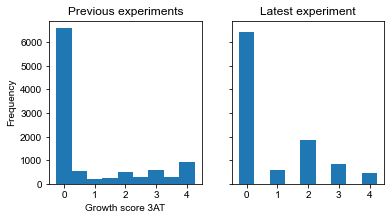

In [74]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(6, 3)
axs[0].set_title('Previous experiments')
df['3AT_old'].plot.hist(bins=9, range=(-0.25, 4.25), ax=axs[0])
axs[1].set_title('Latest experiment')
df['3AT_new'].plot.hist(bins=9, range=(-0.25, 4.25), ax=axs[1])
axs[0].set_xlabel('Growth score 3AT')
fig.savefig(fig_dir / 'growth-on-3AT_new-vs-old_histogram.pdf',
            bbox_inches='tight')

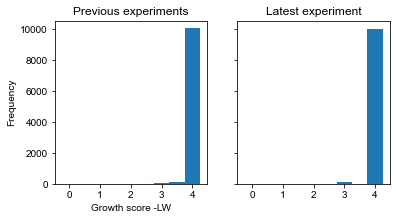

In [73]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(6, 3)
axs[0].set_title('Previous experiments')
df['LW_old'].plot.hist(bins=9, range=(-0.25, 4.25), ax=axs[0])
axs[1].set_title('Latest experiment')
df['LW_new'].plot.hist(bins=9, range=(-0.25, 4.25), ax=axs[1])
axs[0].set_xlabel('Growth score -LW')
fig.savefig(fig_dir / 'growth-on-LW_new-vs-old_histogram.pdf',
            bbox_inches='tight')

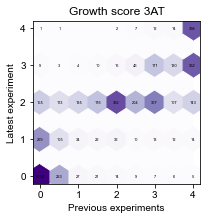

In [147]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3, 3)
bins = ax.hexbin(x=df.loc[df['final_seq'] == 1, :].dropna()['3AT_old'].values,
                 y=df.loc[df['final_seq'] == 1, :].dropna()['3AT_new'].values,
                 vmax=500, 
                 gridsize=(8, 4),
                 cmap='Purples')


for count, (x, y) in zip(bins.get_array(), bins.get_offsets()):
    if count > 0:
        ax.text(s=str(int(count)), x=x, y=y,
                ha='center',
                va='center',
                fontsize=4)


#cb = fig.colorbar(bins)
#cb.set_label('Pairs')
ax.set_title('Growth score 3AT')
ax.set_xlabel('Previous experiments')
ax.set_ylabel('Latest experiment')
fig.savefig(fig_dir / 'growth-on-3AT_new-vs-old_hexbin.pdf',
            bbox_inches='tight')

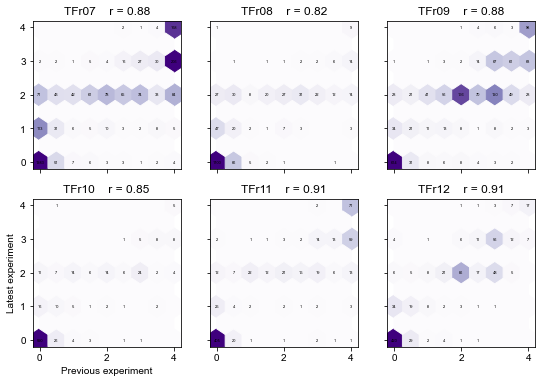

In [159]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(3 * 3, 3 * 2)


for i, ax in zip(range(7, 13), axs.flatten()):
    experiment_id = 'TFr' + str(i).zfill(2)
    x = df.loc[(df['final_seq'] == 1) & (df['standard_batch'] == experiment_id), :].dropna()['3AT_old'].values
    y = df.loc[(df['final_seq'] == 1) & (df['standard_batch'] == experiment_id), :].dropna()['3AT_new'].values
    bins = ax.hexbin(x=x,
                    y=y,
                    vmax=200, 
                    gridsize=(8, 4),
                    cmap='Purples')
    for count, (x_pos, y_pos) in zip(bins.get_array(), bins.get_offsets()):
        if count > 0:
            ax.text(s=str(int(count)), x=x_pos, y=y_pos,
                    ha='center',
                    va='center',
                    fontsize=4)
    ax.set_title(experiment_id + '    r = {:.2f}'.format(stats.pearsonr(x, y)[0]))
    ax.set_xlabel('')
axs[1, 0].set_ylabel('Latest experiment')
axs[1, 0].set_xlabel('Previous experiment')


fig.savefig(fig_dir / 'growth-on-3AT_new-vs-old-split-by-experiment_hexbin.pdf',
            bbox_inches='tight')

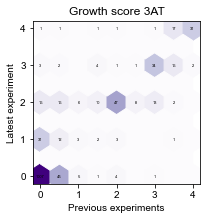

In [144]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(3, 3)
bins = ax.hexbin(x=df.loc[df['final_seq'] == 0, :].dropna()['3AT_old'].values,
                 y=df.loc[df['final_seq'] == 0, :].dropna()['3AT_new'].values,
                 vmax=100, 
                 gridsize=(8, 4),
                 cmap='Purples')


for count, (x, y) in zip(bins.get_array(), bins.get_offsets()):
    if count > 0:
        ax.text(s=str(int(count)), x=x, y=y,
                ha='center',
                va='center',
                fontsize=4)


#cb = fig.colorbar(bins)
#cb.set_label('Pairs')
ax.set_title('Growth score 3AT')
ax.set_xlabel('Previous experiments')
ax.set_ylabel('Latest experiment')
fig.savefig(fig_dir / 'growth-on-3AT_new-vs-old-sequence-failures_hexbin.pdf',
            bbox_inches='tight')

In [162]:
df.head()

,large_plate_name,retest_pla_new,retest_pos_new,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new,category,3AT_old,LW_old,standard_batch,retest_pla_old,retest_pos_old,final_seq
0,TFfnlr01_001_002_003_004_005_006,2,H09,TGIF1-2,100367,CTBP1,6221,0.0,4.0,lit_bm_isoforms,0.0,4.000000,TFr09,32,F12,0
1,TFfnlr01_001_002_003_004_005_006,2,C12,GLI1-3,100225,SUFU,6119,4.0,4.0,tf_isoform_ppis,4.0,4.000000,TFr11,3,C10,1
2,TFfnlr01_001_002_003_004_005_006,2,C11,GLI1-3,100225,STK36,100009376,2.0,4.0,tf_isoform_ppis,1.0,3.666667,TFr12,33,F02,0
3,TFfnlr01_001_002_003_004_005_006,2,C10,GLI1-3,100225,PRKAA2,14015,3.0,4.0,tf_isoform_ppis,3.0,4.000000,TFr12,3,B07,1
4,TFfnlr01_001_002_003_004_005_006,2,C09,GLI1-3,100225,PITX1,6137,0.0,3.0,tf_paralog_ppis,0.0,4.000000,TFr08,56,F07,0


In [176]:
# split by plate
r_by_plate = {}
for i in range(7, 13):
    experiment_id = 'TFr' + str(i).zfill(2)
    for plate in df.loc[df['standard_batch'] == experiment_id, 'retest_pla_old'].unique():
        x = df.loc[(df['final_seq'] == 1) & 
                   (df['standard_batch'] == experiment_id) &
                   (df['retest_pla_old'] == plate), :].dropna()['3AT_old'].values
        y = df.loc[(df['final_seq'] == 1) &
                   (df['standard_batch'] == experiment_id) &
                   (df['retest_pla_old'] == plate), :].dropna()['3AT_new'].values
        if len(x) < 2:
            continue
        r_by_plate[experiment_id + ' – ' + str(plate)] = stats.pearsonr(x, y)[0]

/Users/lukelambourne/work/tf_isoforms/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


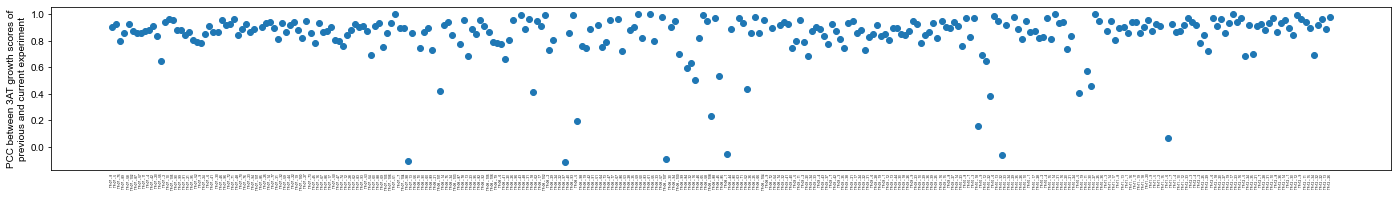

In [182]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(24, 3)
ax.scatter(x=list(r_by_plate.keys()), y=list(r_by_plate.values()))
ax.xaxis.set_tick_params(rotation=90, labelsize=3, size=0)
ax.set_ylabel('PCC between 3AT growth scores of\nprevious and current experiment')
fig.savefig(fig_dir / 'correlation-3AT-growth-old-vs-new-experiment_by-plate-in-old-experiment_dot.pdf',
            bbox_inches='tight')

In [186]:
# split by plate
diff_by_plate = {}
for i in range(7, 13):
    experiment_id = 'TFr' + str(i).zfill(2)
    for plate in df.loc[df['standard_batch'] == experiment_id, 'retest_pla_old'].unique():
        x = df.loc[(df['final_seq'] == 1) & 
                   (df['standard_batch'] == experiment_id) &
                   (df['retest_pla_old'] == plate), :].dropna()['3AT_old'].values
        y = df.loc[(df['final_seq'] == 1) &
                   (df['standard_batch'] == experiment_id) &
                   (df['retest_pla_old'] == plate), :].dropna()['3AT_new'].values
        if len(x) < 2:
            continue
        diff_by_plate[experiment_id + ' – ' + str(plate)] = np.mean(np.abs(x - y))

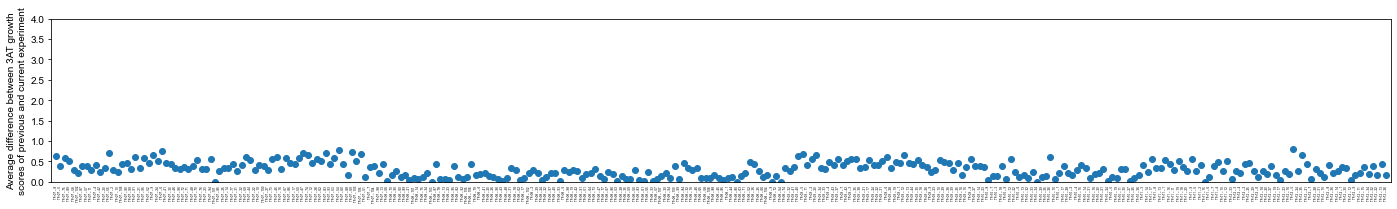

In [202]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(24, 3)
ax.scatter(x=list(diff_by_plate.keys()), y=list(diff_by_plate.values()))
ax.xaxis.set_tick_params(rotation=90, labelsize=3, size=0)
ax.set_ylabel('Average difference between 3AT growth\nscores of previous and current experiment')
ax.set_ylim(0, 4)
ax.set_xlim(-1, len(diff_by_plate))
fig.savefig(fig_dir / 'mean-absolute-difference-3AT-growth-old-vs-new-experiment_by-plate-in-old-experiment_dot.pdf',
            bbox_inches='tight')

In [195]:
df.head()

,large_plate_name,retest_pla_new,retest_pos_new,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new,category,3AT_old,LW_old,standard_batch,retest_pla_old,retest_pos_old,final_seq
0,TFfnlr01_001_002_003_004_005_006,2,H09,TGIF1-2,100367,CTBP1,6221,0.0,4.0,lit_bm_isoforms,0.0,4.000000,TFr09,32,F12,0
1,TFfnlr01_001_002_003_004_005_006,2,C12,GLI1-3,100225,SUFU,6119,4.0,4.0,tf_isoform_ppis,4.0,4.000000,TFr11,3,C10,1
2,TFfnlr01_001_002_003_004_005_006,2,C11,GLI1-3,100225,STK36,100009376,2.0,4.0,tf_isoform_ppis,1.0,3.666667,TFr12,33,F02,0
3,TFfnlr01_001_002_003_004_005_006,2,C10,GLI1-3,100225,PRKAA2,14015,3.0,4.0,tf_isoform_ppis,3.0,4.000000,TFr12,3,B07,1
4,TFfnlr01_001_002_003_004_005_006,2,C09,GLI1-3,100225,PITX1,6137,0.0,3.0,tf_paralog_ppis,0.0,4.000000,TFr08,56,F07,0


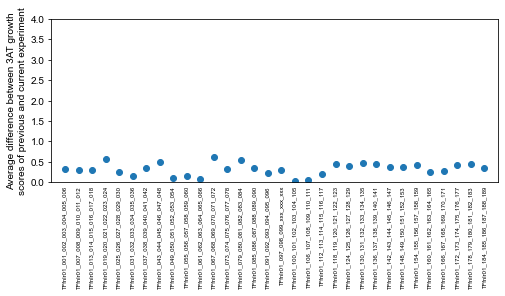

In [220]:
diff_by_new_plate = {}
for plate in df['large_plate_name'].unique():
    x = df.loc[(df['final_seq'] == 1) & 
                (df['large_plate_name'] == plate), :].dropna()['3AT_old'].values
    y = df.loc[(df['final_seq'] == 1) &
                (df['large_plate_name'] == plate), :].dropna()['3AT_new'].values
    if len(x) < 2:
        continue
    diff_by_new_plate[plate] = np.mean(np.abs(x - y))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 3)
ax.scatter(x=list(diff_by_new_plate.keys()), y=list(diff_by_new_plate.values()))
ax.xaxis.set_tick_params(rotation=90, labelsize=6, size=0)
ax.set_ylabel('Average difference between 3AT growth\nscores of previous and current experiment')
ax.set_ylim(0, 4)
ax.set_xlim(-1, len(diff_by_new_plate))
fig.savefig(fig_dir / 'mean-absolute-difference-3AT-growth-old-vs-new-experiment_by-plate-in-new-experiment_dot.pdf',
            bbox_inches='tight')

In [184]:
experiment_id = 'TFr08'
plate = 107
df.loc[(df['final_seq'] == 1) & 
        (df['standard_batch'] == experiment_id) &
        (df['retest_pla_old'] == plate), :].dropna()

,large_plate_name,retest_pla_new,retest_pos_new,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new,category,3AT_old,LW_old,standard_batch,retest_pla_old,retest_pos_old,final_seq
1301,TFfnlr01_031_032_033_034_035_036,36,E06,ZNF397-5,100687,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,A11,1
1313,TFfnlr01_031_032_033_034_035_036,36,D06,ZNF397-4,100432,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,G10,1
1325,TFfnlr01_031_032_033_034_035_036,36,C06,ZNF397-3,100629,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.166667,4.0,TFr08,107,H10,1
1349,TFfnlr01_031_032_033_034_035_036,36,A06,ZNF397-1,100153,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,F10,1
1481,TFfnlr01_031_032_033_034_035_036,33,B06,ZNF24-2,100181,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,A10,1
1493,TFfnlr01_031_032_033_034_035_036,33,A06,ZNF24-1,100505,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,B10,1
1538,TFfnlr01_031_032_033_034_035_036,34,A06,ZKSCAN1-1,101136,SRPK2,8065,0.0,4.0,tf_paralog_ppis,0.000000,4.0,TFr08,107,E09,1
3191,TFfnlr01_067_068_069_070_071_072,72,A02,HNF4A-1,100602,ZBTB16,8127,1.0,4.0,non_paralog_control,0.000000,4.0,TFr08,107,H05,1
3215,TFfnlr01_067_068_069_070_071_072,72,C02,HNF4A-3,100010,ZBTB16,8127,0.0,4.0,non_paralog_control,0.000000,4.0,TFr08,107,C05,1
3583,TFfnlr01_073_074_075_076_077_078,75,A06,HNF4A-1,100602,HDX,71828,0.0,4.0,non_paralog_control,0.000000,4.0,TFr08,107,C03,1


In [216]:
df['ad_gene_symbol'] = df['ad_clone_acc'].apply(lambda x: '-'.join(x.split('-')[:-1]))

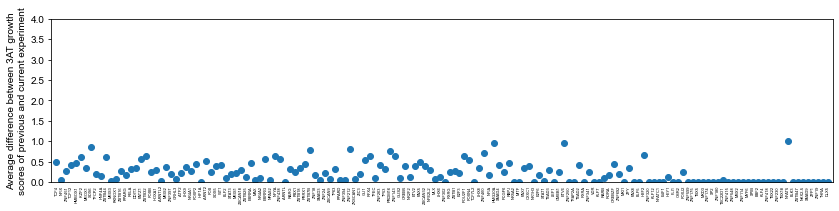

In [222]:
diff_by_ad = {}
for plate in df['ad_gene_symbol'].value_counts().index:
    x = df.loc[(df['final_seq'] == 1) & 
                (df['ad_gene_symbol'] == plate), :].dropna()['3AT_old'].values
    y = df.loc[(df['final_seq'] == 1) &
                (df['ad_gene_symbol'] == plate), :].dropna()['3AT_new'].values
    if len(x) < 2:
        continue
    diff_by_ad[plate] = np.mean(np.abs(x - y))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 3)
ax.scatter(x=list(diff_by_ad.keys()), y=list(diff_by_ad.values()))
ax.xaxis.set_tick_params(rotation=90, labelsize=4, size=0)
ax.set_ylabel('Average difference between 3AT growth\nscores of previous and current experiment')
ax.set_ylim(0, 4)
ax.set_xlim(-1, len(diff_by_ad))
fig.savefig(fig_dir / 'mean-absolute-difference-3AT-growth-old-vs-new-experiment_by-AD-TF-gene_dot.pdf',
            bbox_inches='tight')

In [225]:
df.loc[df['ad_gene_symbol'] == 'NFAT5']

,large_plate_name,retest_pla_new,retest_pos_new,ad_clone_acc,ad_orf_id,db_gene_symbol,db_orf_id,3AT_new,LW_new,category,3AT_old,LW_old,standard_batch,retest_pla_old,retest_pos_old,final_seq,ad_gene_symbol
4657,TFfnlr01_091_092_093_094_095_096,92,D11,NFAT5-1,101044,FABP1,9804,0.0,4.0,rrs_isoforms,0.0,4.0,TFr09,1,E01,1,NFAT5
4731,TFfnlr01_097_098_099_xxx_xxx_xxx,98,E10,NFAT5-1,101044,ING3,14384,2.0,4.0,rrs_isoforms,0.0,4.0,TFr07,8,D02,1,NFAT5


In [ ]:
df.loc[df['ad_gene_symbol'] == 'NFAT5']